<a href="https://colab.research.google.com/github/nischithakn800-ux/import-export-dataset/blob/main/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project name** : Segmenting Credit Card
Users

**Project type** : Customer segmentation project

**Project by** : Nischitha K N

**Github link** :


**Project summary** :

Financial institutions often struggle to understand diverse customer behaviors. This project aims to segment credit card users based on their transaction patterns, payment habits, and credit usage, enabling data-driven personalization in marketing, risk management, and customer service.

**Dataset Description** :

The dataset includes anonymized customer-level features such as:

**Balance-related metrics**: Balance, Balance Frequency, Credit Limit

**Purchase behavior**: Purchases, Purchase Frequency, One-off Purchases, Installments Purchases

**Cash usage**: Cash Advance, Cash Advance Frequency

**Payment habits**: Payments, Minimum Payments, Payment to Minimum Payment Ratio

**Tenure**: Months on Book, Tenure

**Data Preprocessing** :

Missing values handled using imputation or removal

Outliers detected via IQR or Z-score methods

Feature scaling applied using StandardScaler to normalize data

Correlation analysis performed to identify redundant features

**Dimensionality Reduction with PCA** :

Principal Component Analysis (PCA) reduced high-dimensional data to 2–3 components

Explained variance plot used to select optimal number of components

PCA helped visualize clusters and improved algorithm performance

**Clustering Techniques** :

**K-Means Clustering**
Applied with varying k values

Elbow Method used to find optimal k

Silhouette Score evaluated cluster quality

Resulted in compact, spherical clusters

**Tools & Technologies** :

Python (Colab environment)

Pandas, NumPy for data handling

Matplotlib, Seaborn for visualization

Scikit-learn for PCA and K-Means


**Import Libraries**

In [85]:
# Installing the scikit-learn-extra library to use K-Medoids

# please uncomment this if you have to install sklearn_extra
!pip install scikit-learn-extra

In [86]:
# Common modules for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Classes for preprocessing, clustering, PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import plotly.express as px
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN


**Data Wrangling**

Prepare data by handling missing and invalid values, also making sure every feature has the correct data type

In [87]:
data = pd.read_csv('https://raw.githubusercontent.com/daniel-bss/credit-card-clustering/main/CC%20GENERAL.csv', index_col = 'CUST_ID') # Set the customer's ID as index
print(data.shape)
data.head()

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [88]:
data.isna().sum()


,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


It's shown that CREDIT_LIMIT only has 1 missing value, which can simply be removed from the dataset

MINIMUM_PAYMENTS has 313 missing values, that should be treated specifically

**Treating MINIMUM_PAYMENTS missing values**


In [89]:
data[['PAYMENTS', 'MINIMUM_PAYMENTS']][data['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
CUST_ID,,
C10004,0.000000,NaN
C10047,0.000000,NaN
C10049,0.000000,NaN
C10056,417.016763,NaN
C10057,0.000000,NaN
...,...,...
C19160,0.000000,NaN
C19170,0.000000,NaN
C19176,0.000000,NaN


It is pretty obvious that customers who haven't done any payments wouldn't have minimum payments also
Hence, if PAYMENTS = 0, MINIMUM_PAYMENTS = 0

In [90]:
# Looking at PAYMENTS that's above MINIMUM_PAYMENTS

print('Shape:', data[['PAYMENTS', 'MINIMUM_PAYMENTS']][(data['MINIMUM_PAYMENTS'].notna()) & (data['PAYMENTS'] > data['MINIMUM_PAYMENTS'])].shape)
data[['PAYMENTS', 'MINIMUM_PAYMENTS']][(data['MINIMUM_PAYMENTS'].notna()) & (data['PAYMENTS'] > data['MINIMUM_PAYMENTS'])].head()

Shape: (6272, 2)


,PAYMENTS,MINIMUM_PAYMENTS
CUST_ID,,
C10001,201.802084,139.509787
C10002,4103.032597,1072.340217
C10005,678.334763,244.791237
C10007,6354.314328,198.065894
C10008,679.065082,532.033990


**Exploratory Data Analysis (EDA)**

Conducting EDA to develop understanding on the data and gain more insights before stepping further on Data Pre-processing and Modeling

Taking a glance of data distributions

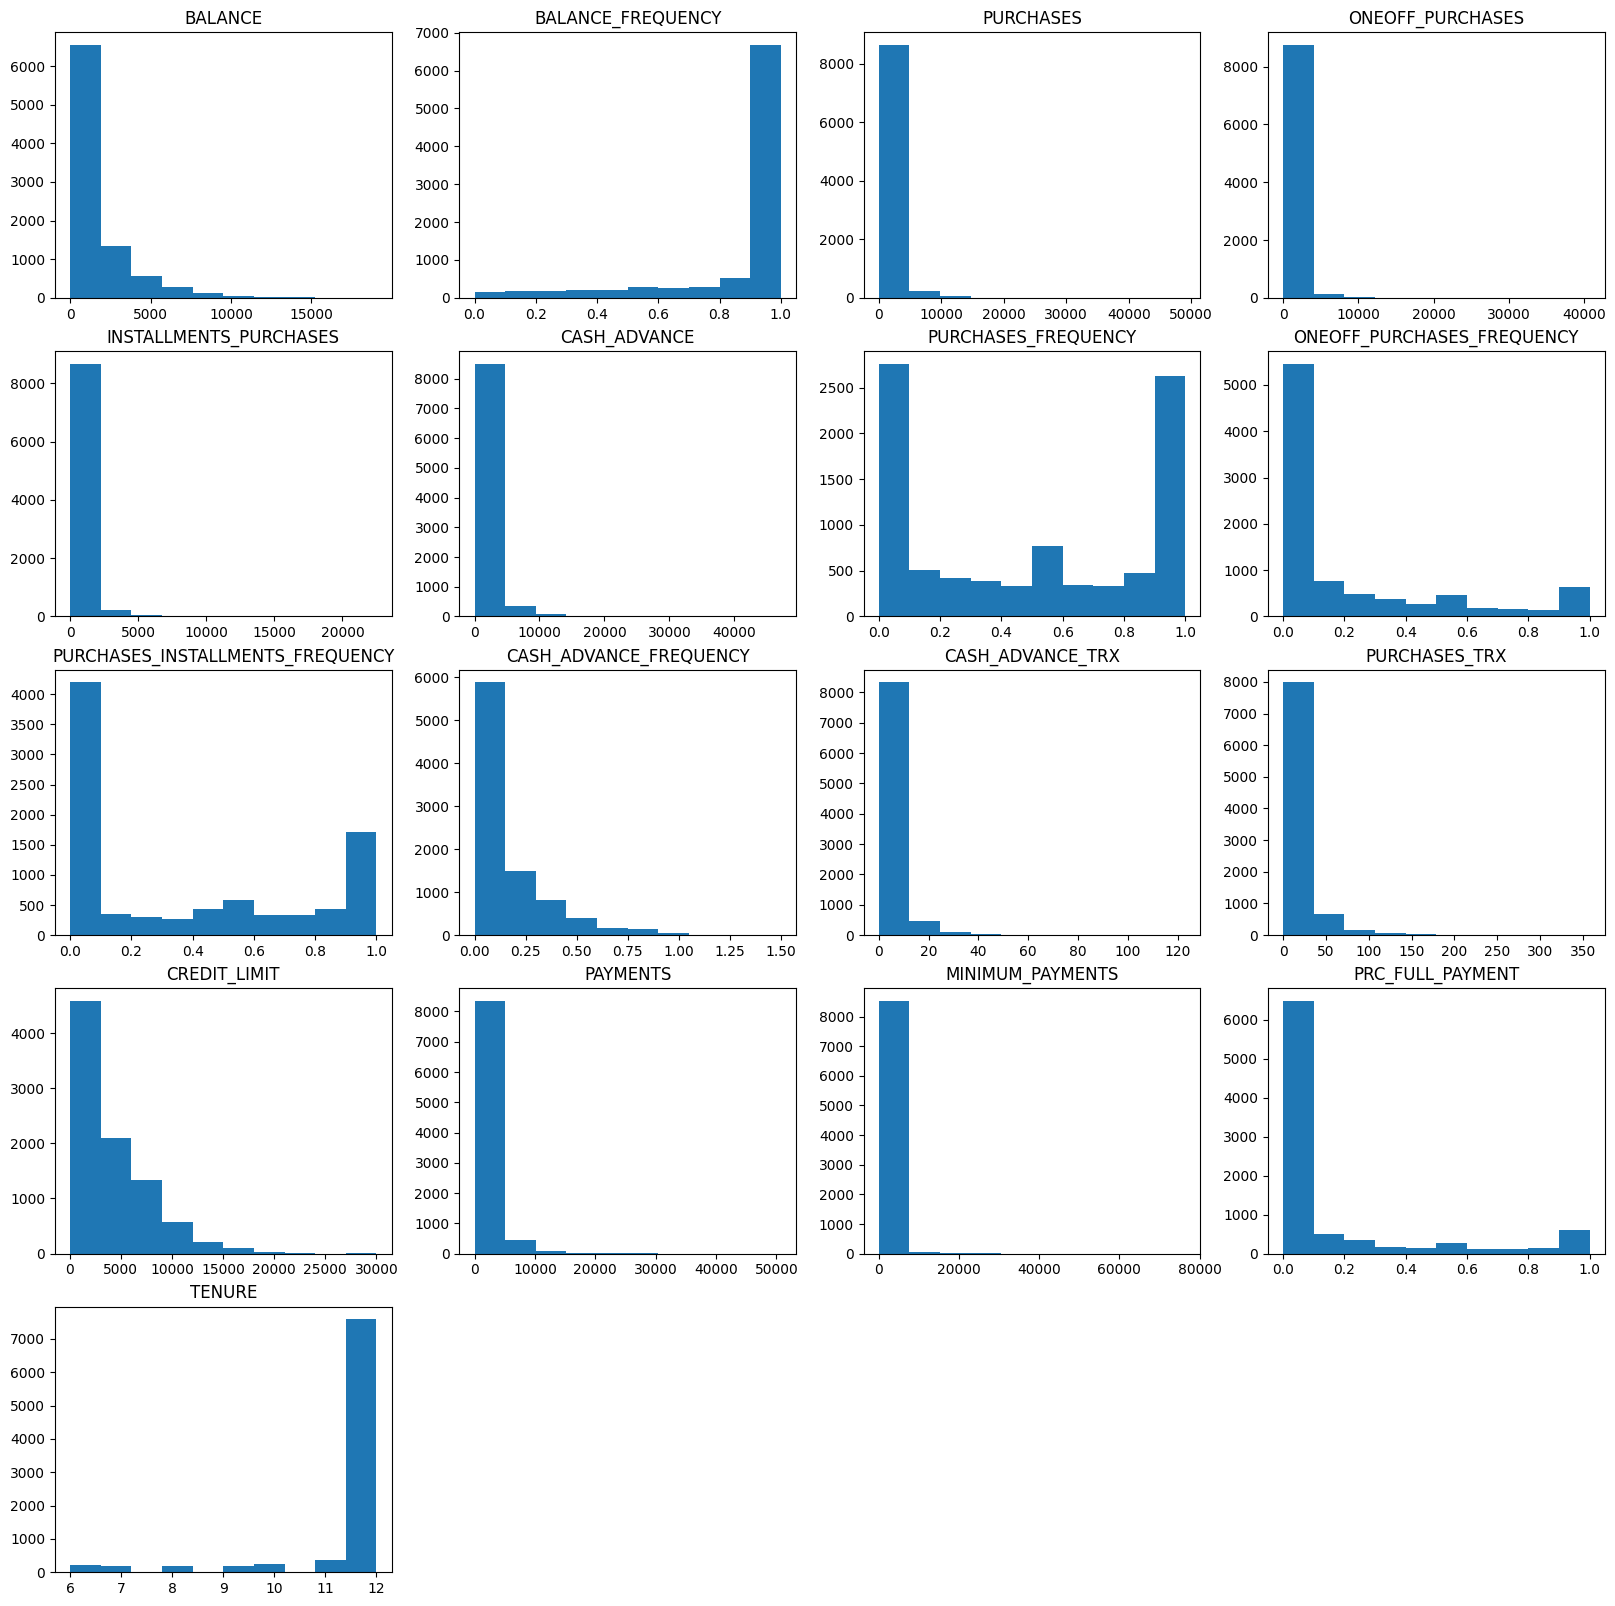

In [91]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize = (20,20))

z = 0
for i in range(5):
    for j in range(4):
        if z > 16:
            axs[i][j].axis(False)
        else:
            axs[i][j].set_title(data.iloc[:,z].name)
            axs[i][j].hist(data.iloc[:,z])
        z+=1


Turns out every feature has outliers. But this doesn't mean that we will delete the outliers, because it's possible that all of these values do happen on the field.
Hence, the treatment that will be applied is to do logarithmic scale for each features.

Logarithmic scale is used because, mathematically huge numbers will be kept much smaller without losing the meaning of the data.

In [92]:
logscaled_data = np.log2(data + 0.01)
logscaled_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,5.354408,-0.271980,6.576069,-6.643856,6.576069,-6.643856,-2.500896,-6.643856,-3.421469,-6.643856,-6.643856,1.007196,9.965799,7.656869,7.124326,-6.643856,3.586164
C10002,11.644973,-0.121720,-6.643856,-6.643856,-6.643856,12.653507,-6.643856,-6.643856,-6.643856,-1.943416,2.003602,-6.643856,12.773141,12.002478,10.066560,-2.106423,3.586164
C10003,11.284916,0.014355,9.594661,9.594661,-6.643856,-6.643856,0.014355,0.014355,-6.643856,-6.643856,-6.643856,3.586164,12.872677,9.280949,9.293000,-6.643856,3.586164
C10004,10.702762,-0.629581,10.549794,10.549794,-6.643856,7.685085,-3.421469,-3.421469,-6.643856,-3.421469,0.014355,0.014355,12.872677,-6.643856,NaN,-6.643856,3.586164
C10005,9.675471,0.014355,4.000901,4.000901,-6.643856,-6.643856,-3.421469,-3.421469,-6.643856,-6.643856,-6.643856,0.014355,10.228831,9.405875,7.935467,-6.643856,3.586164


**Trying different scalers:**

MinMaxScaler

StandardScaler

RobustScaler

MaxAbsScaler

**MinMaxScaler**

MinMax Scaling is a scaler that is highly influenced by the maximum and minimum values in our data so if our data contains outliers it is going to be biased. MinMaxScaler rescales the data set in such a way that all features values are in the range [0, 1]. This is done by feature-wise in an independent way.

In [93]:
minMaxScaler = MinMaxScaler().fit_transform(logscaled_data)

**StandardScaler**

StandardScaler is a scaler that move the whole dataset into the center/origin point and scaling it, which results in 0 Mean and 1 Standard Deviation

In [94]:
standardScaler = StandardScaler().fit_transform(logscaled_data)

**RobustScaler**

RobustScaler behaves similar to MinMaxScaler, but instead of using its Minimum and Maximum values, RobustScaler uses the 1sr and 3rd Quartile. With this way, data won't be affected by the presence of Outliers (huge number)

In [95]:
robustScaler = RobustScaler().fit_transform(logscaled_data)

**MaxAbsScaler**

MaxAbsScaler scales the data by the Absolute and Maximum number. So the presence of massive negative numbers will become 1

In [96]:
maxAbsScaler = MaxAbsScaler().fit_transform(logscaled_data)

**Dimensionality Reduction using Principal Component Analysis¶**

Principal Component Analysis (PCA) is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another.

So after having 4 different scaled data, we will use it against PCA and choose which one results in good cluster in 3D Scatter Plot

**PCA with MinMaxScaler**

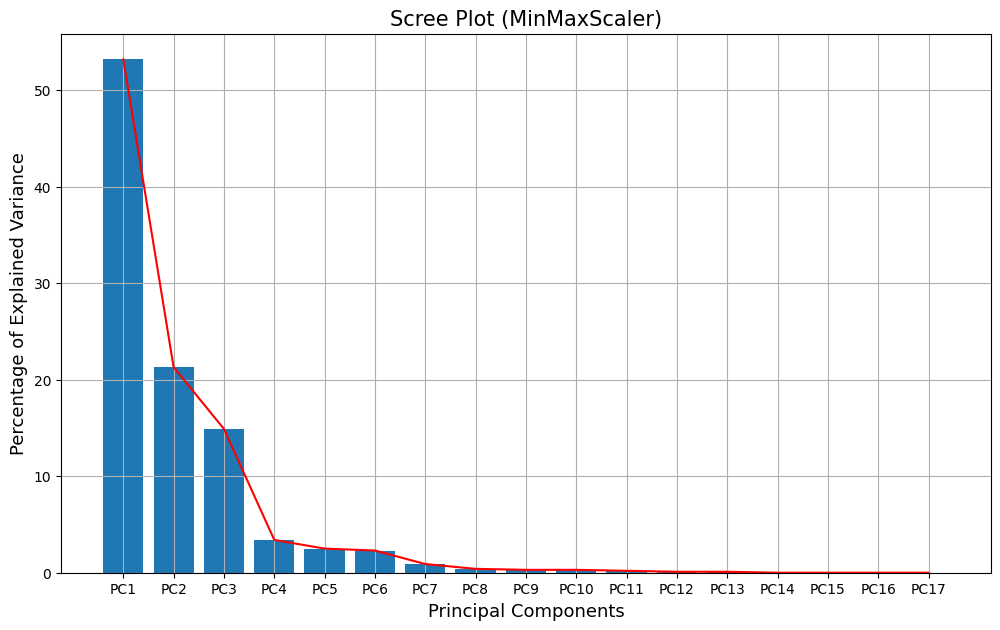

89.4% variance of the dataset lies on the first 3 Principal Components


In [97]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
logscaled_data_imputed = imputer.fit_transform(logscaled_data)

# Convert the imputed data back to a DataFrame (optional, but good for readability)
logscaled_data_imputed = pd.DataFrame(logscaled_data_imputed, columns=logscaled_data.columns, index=logscaled_data.index)

# Now apply PCA on the imputed data
pca = PCA(n_components = 17)
pca.fit(logscaled_data_imputed) # Use the imputed data here
pca_data = pca.transform(logscaled_data_imputed)

def scree_plot(pca, scaler):
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    plt.figure(figsize = (12,7))
    plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
    plt.plot(range(1,len(per_var)+1), per_var, c = 'red')
    plt.ylabel('Percentage of Explained Variance', size = 13)
    plt.xlabel('Principal Components', size = 13)
    plt.title('Scree Plot (%s)' %(scaler), size = 15)
    plt.grid()
    plt.show()
    print('%s%% variance of the dataset lies on the first 3 Principal Components'  %(np.sum(per_var[:3])))

# Assuming 'MinMaxScaler' is the name of the scaler used before log scaling
scree_plot(pca, 'MinMaxScaler')

In [98]:
def scatter_plot3D(pca_data):
    x, y, z = pca_data[:,:3].T
    fig = px.scatter_3d(x = x,
                        y = y,
                        z = z)
    fig.show()

scatter_plot3D(pca_data)


Data scatters is clustered very clearly, which can be seen as 7 clusters

**PCA with StandardScaler**

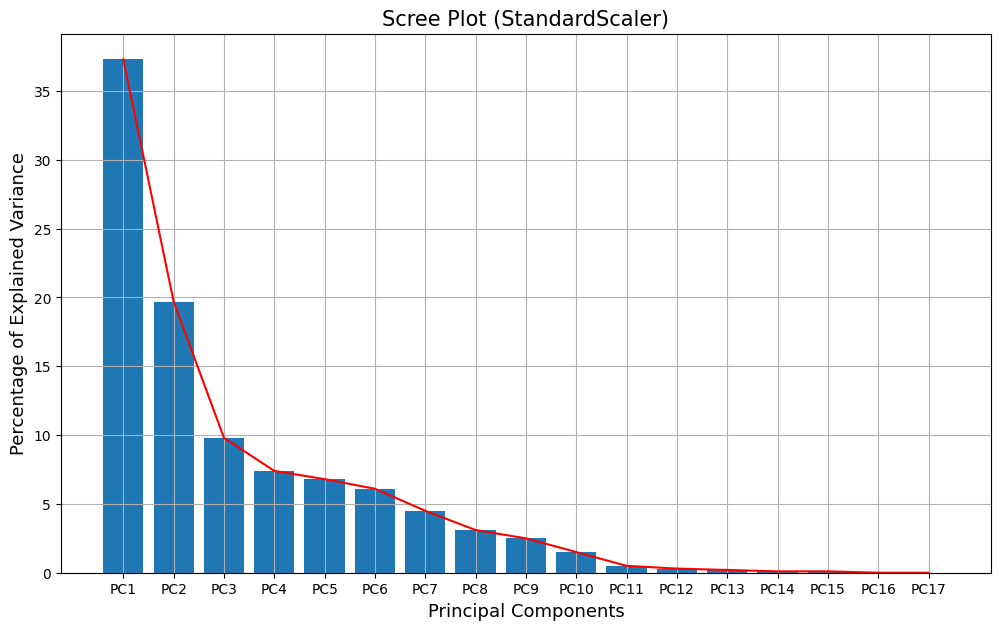

66.8% variance of the dataset lies on the first 3 Principal Components


In [99]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in standardScaler with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
standardScaler_imputed = imputer.fit_transform(standardScaler)

pca = PCA(n_components = 17)
pca.fit(standardScaler_imputed) # Use the imputed data here
pca_data = pca.transform(standardScaler_imputed)

scree_plot(pca, 'StandardScaler')

In [100]:
scatter_plot3D(pca_data)

**PCA with RobustScaler**

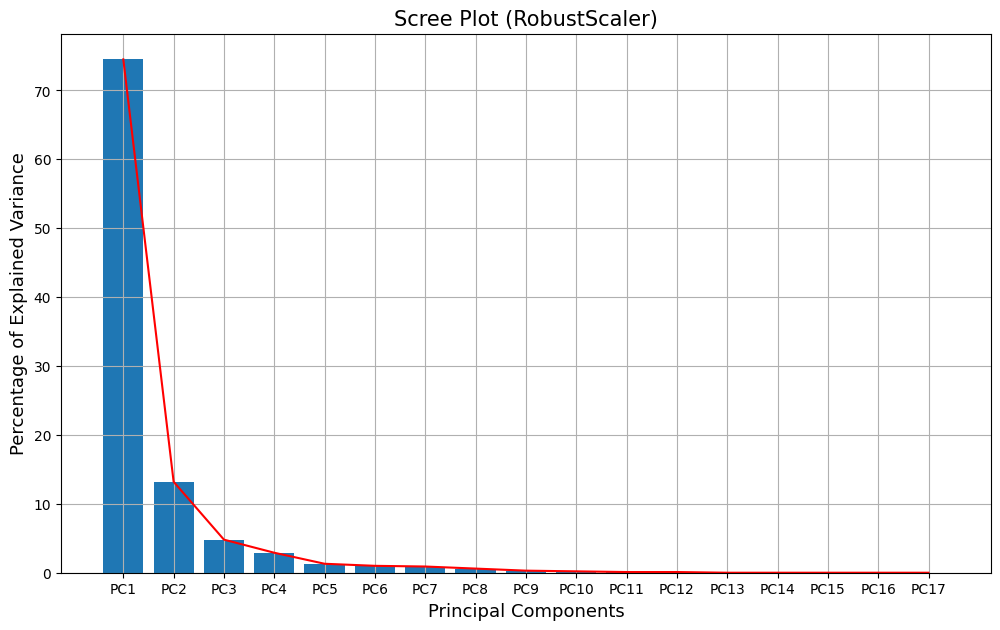

92.5% variance of the dataset lies on the first 3 Principal Components


In [101]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in robustScaler with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
robustScaler_imputed = imputer.fit_transform(robustScaler)


pca = PCA(n_components = 17)
pca.fit(robustScaler_imputed) # Use the imputed data here
pca_data = pca.transform(robustScaler_imputed)

scree_plot(pca, 'RobustScaler')

In [102]:
scatter_plot3D(pca_data)


**PCA with MaxAbsScale**r

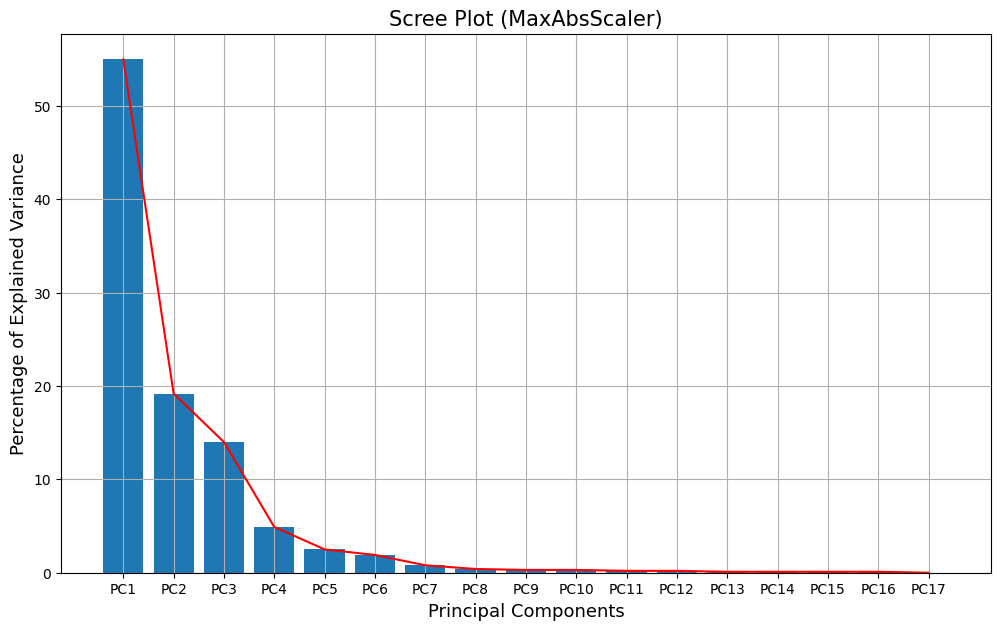

88.2% variance of the dataset lies on the first 3 Principal Components


In [103]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in maxAbsScaler with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
maxAbsScaler_imputed = imputer.fit_transform(maxAbsScaler)

pca = PCA(n_components = 17)
pca.fit(maxAbsScaler_imputed) # Use the imputed data here
pca_data = pca.transform(maxAbsScaler_imputed)

scree_plot(pca, 'MaxAbsScaler')

In [104]:
scatter_plot3D(pca_data)

This result behave similar to MinMaxScaler, but around each clusters are surrounded by some unclustered data, which likely to be anomalies that don't cluster well.

**Conclusion on Data Preparation**

MinMaxScaler did the best for resulting in good shape of clusters, and also have big value of 3 Principal Components which is 81.5%
Hence, MinMaxScaler is used to transform the data before PCA Transformation

In [105]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in minMaxScaler with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
minMaxScaler_imputed = imputer.fit_transform(minMaxScaler)

# Final decision to use MinMAxScaler to transform data fed into PCA:
pca = PCA(n_components = 17)
pca.fit(minMaxScaler_imputed) # Use the imputed data here
pca_data = pca.transform(minMaxScaler_imputed)
top3_pc = pca_data[:,:3]

**Modeling**

As this case aims to segmentate customers, different Clustering algorithms will be conducted throughout this section

Clustering algorithms that will be used:

**K-Means Clustering**

K-Means Clustering is a type of Unsupervised Learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

Choosing the number of K
If the true label is not known in advance, then K-Means clustering can be evaluated using Elbow Criterion, Silhouette Coefficient, Cross-Validation, Information Criteria, the Information Theoretic Jump Method, and the G-Means Algorithm.

In [106]:
inertia = []
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(top3_pc)
    inertia.append(kmeans.inertia_)
    silh.append(silhouette_score(top3_pc, kmeans.labels_))

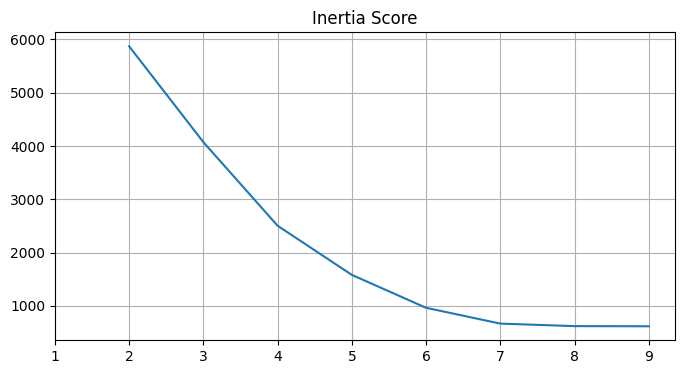

In [107]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Inertia Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

Elbow Criterion Method: The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

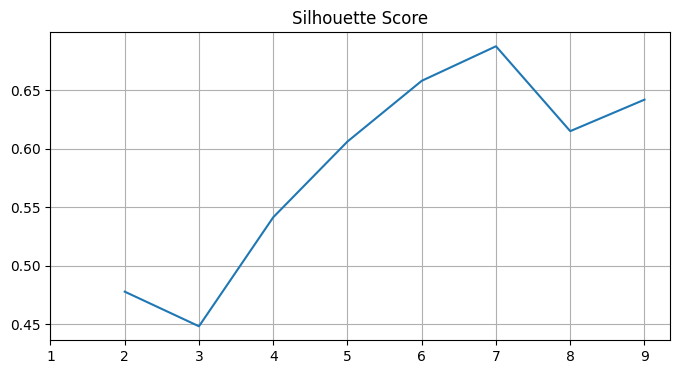

In [108]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()


Silhouette Coefficient Method:

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

The mean distance between a sample and all other points in the same class.
The mean distance between a sample and all other points in the next nearest cluster.

Conclusion:

7 Clusters is chosen, because the elbow is positioned at 7th cluster, and the highest value in Silhouetter Score is also positioned at 7th cluster

In [109]:
# Choosing cluster = 7

kmeans = KMeans(n_clusters=7)
kmeans.fit(top3_pc)
kmeans_labels = kmeans.labels_

In [110]:
x, y, z = top3_pc.T

fig = px.scatter_3d(x = x,
                    y = y,
                    z = z,
                    color = kmeans_labels)
fig.show()

**Conclusion**

This project successfully demonstrated how unsupervised learning techniques like PCA, K-Means can uncover meaningful patterns in credit card customer behavior. By reducing dimensionality with PCA and applying clustering algorithms, we segmented customers into distinct groups based on their spending, payment habits, and credit usage.